solver for Poisson and Laplace equation in 2D

this is from [http://www.eg.bucknell.edu/~mligare/ph333/laplace.html](http://www.eg.bucknell.edu/~mligare/ph333/laplace.html)

In [1]:
import numpy as np

import matplotlib as mpl  
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

from matplotlib import colormaps


In [2]:
# Following is an Ipython magic command that puts figures in the  notebook.
# For figures in separate windows, comment out following line and uncomment
# the next line
# Must come before defaults are changed.
%matplotlib inline
#%matplotlib

# As of Aug. 2017 reverting to 1.x defaults.
# In 2.x text.ustex requires dvipng, texlive-latex-extra, and texlive-fonts-recommended, 
# which don't seem to be universal
# See https://stackoverflow.com/questions/38906356/error-running-matplotlib-in-latex-type1cm?
mpl.style.use('classic')
        
# M.L. modifications of matplotlib defaults using syntax of v.2.0 
# More info at http://matplotlib.org/2.0.0/users/deflt_style_changes.html
# Changes can also be put in matplotlibrc file, or effected using mpl.rcParams[]
plt.rc('figure', figsize = (6, 4.5))            # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True)             # Adjusts supblot parameters for new size

In [3]:
n = 20
m = 10
target = 1e-6
delta = 1

In [4]:
phi_old = np.zeros([n+1,m+1])
phi_old[:, 0] = phi_old[:0] = 0  # Boundary values
phi_old[0,:] = 1                 # Boundary values

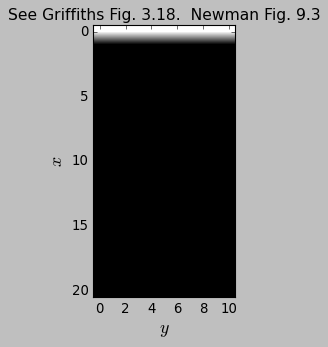

In [ ]:
plt.figure()
plt.xlabel('$y$')
plt.ylabel('$x$')
plt.title('See Griffiths Fig. 3.18.  Newman Fig. 9.3')
plt.imshow(phi_old, cmap='plasma',interpolation='none');

In [6]:
while delta > target:
    phi_new  = (np.roll(phi_old, 1, axis=0) + np.roll(phi_old, -1, axis=0) + np.roll(phi_old, 1, axis=1) \
               + np.roll(phi_old, -1, axis=1))/4
    phi_new[:, 0] = phi_new[:,m] = 0  # Restore boundaries
    phi_new[n,:] = 0                  # Restore boundary
    phi_new[0,:] = 1                  # Restore boundary
    delta = np.max(abs(phi_new - phi_old)) 
    phi_new, phi_old = phi_old, phi_new # phi_new --> phi_old for next iteration
    #print(phi_new)
     
#print(phi)

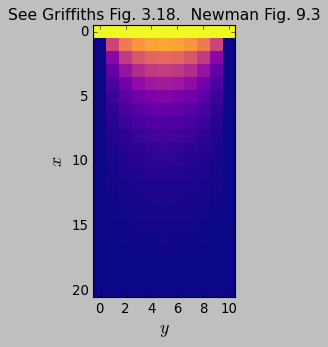

In [7]:
#print (phi_old)
plt.figure()
plt.xlabel('$y$')
plt.ylabel('$x$')
plt.title('See Griffiths Fig. 3.18.  Newman Fig. 9.3')
plt.imshow(phi_old, cmap='plasma',interpolation='none');

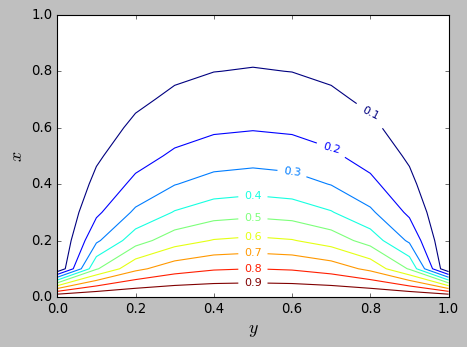

In [8]:
plt.figure()
X = np.linspace(0,1,m+1)
Y = np.linspace(0, 2, n+1)
#CS = plt.contour(X, Y, phi)
CS = plt.contour(X, Y, phi_old, levels=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
plt.clabel(CS, inline=1, fontsize=10)
plt.ylabel('$x$')
plt.xlabel('$y$')
plt.ylim(0,1);